<a href="https://colab.research.google.com/github/HebaAhmedDahab/Big-Market-exploration/blob/main/market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing needed libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#reading the csv file
df = pd.read_csv("/content/bigbasket_products.csv")
df.head(2)

,Unnamed: 0,product,category,sub_category,brand,sale_price,market_price,image_url,p_url,type,eancode,rating,description
0,0,Original Disinfectant Toilet Cleaner Liquid,Cleaning & Household,All Purpose Cleaners,Harpic,489.0,534.0,https://www.bigbasket.com/media/uploads/p/s/12...,https://www.bigbasket.com/pd/1207190/harpic-or...,Toilet Cleaners,Invalid Code,4.2,Harpic All in One is the one-stop shop for all...
1,1,Disinfectant Surface & Floor Cleaner Liquid - ...,Cleaning & Household,All Purpose Cleaners,Lizol,302.0,380.0,https://www.bigbasket.com/media/uploads/p/s/24...,https://www.bigbasket.com/pd/249154/lizol-disi...,Floor & Other Cleaners,8901396115113,4.2,Lizol is India's No.1 Household Cleaning Brand...


## Cleaning Step
 

In [ ]:
#dropping the unnecessary columns
df.drop(['description','eancode','image_url','p_url','Unnamed: 0'], inplace=True, axis=1)
data = df.copy()

In [ ]:
data.isna().sum()

product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8663
dtype: int64

In [ ]:
#dropping the columns that have the same null value in the same row

data.dropna(subset=["product","brand"],inplace=True)
data.isna().sum()

product            0
category           0
sub_category       0
brand              0
sale_price         0
market_price       0
type               0
rating          8662
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27553 entries, 0 to 27554
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product       27553 non-null  object 
 1   category      27553 non-null  object 
 2   sub_category  27553 non-null  object 
 3   brand         27553 non-null  object 
 4   sale_price    27553 non-null  float64
 5   market_price  27553 non-null  float64
 6   type          27553 non-null  object 
 7   rating        18891 non-null  float64
dtypes: float64(3), object(5)
memory usage: 1.9+ MB


In [ ]:
data['market_price'] = data['market_price'].astype(int).round(0)
data['sale_price'] = data['sale_price'].astype(int).round(0)
data['profit'] = (data['market_price'] - data['sale_price']).astype(int).round(0)

In [ ]:
data.head(2)

,product,category,sub_category,brand,sale_price,market_price,type,rating,profit
0,Original Disinfectant Toilet Cleaner Liquid,Cleaning & Household,All Purpose Cleaners,Harpic,489,534,Toilet Cleaners,4.2,45
1,Disinfectant Surface & Floor Cleaner Liquid - ...,Cleaning & Household,All Purpose Cleaners,Lizol,302,380,Floor & Other Cleaners,4.2,78


In [ ]:
data.duplicated().sum()

362

In [ ]:
data = data.drop_duplicates(subset=['sale_price', 'market_price'], keep='first')

In [ ]:
data.isna().sum()

product            0
category           0
sub_category       0
brand              0
sale_price         0
market_price       0
type               0
rating          2088
profit             0
dtype: int64

In [ ]:
data.describe()

,sale_price,market_price,rating,profit
count,6762.000000,6762.000000,4674.000000,6762.000000
mean,509.908459,656.060189,3.924305,146.151730
std,728.970357,896.038993,0.719390,287.571446
min,2.000000,3.000000,1.000000,0.000000
25%,139.000000,180.000000,3.700000,16.000000
50%,282.000000,375.000000,4.100000,56.000000
75%,558.750000,730.000000,4.300000,156.000000
max,12500.000000,12500.000000,5.000000,4320.000000


In [ ]:
data.sample(2)

,product,category,sub_category,brand,sale_price,market_price,type,rating,profit
6159,Cucumber - Mangalore,Fruits & Vegetables,Fresh Vegetables,Fresho,34,62,Cucumber & Capsicum,NaN,28
6139,Spring Onion,Fruits & Vegetables,Fresh Vegetables,Fresho,13,16,Leafy Vegetables,NaN,3


##Exploring

##Q1. What are the highest profit categories/brand of products on BigBasket?

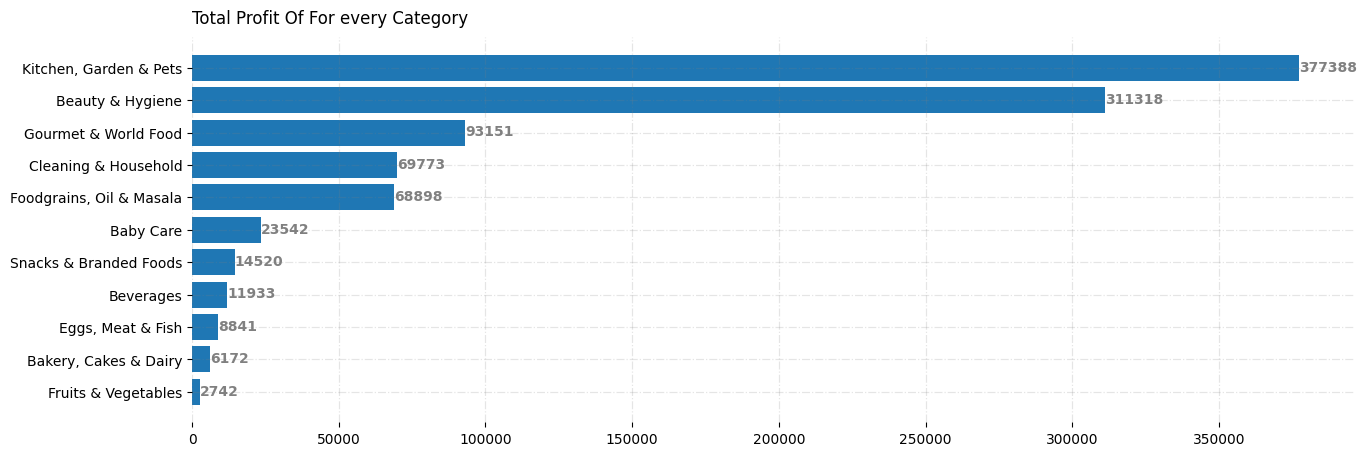

In [ ]:
category_profit= data.groupby(["category"])["profit"].sum().reset_index().sort_values(["category","profit"],ascending=False)
category = category_profit.nlargest(15,'profit')
fig, ax = plt.subplots(figsize=(15,5))

category_profit_sorted = category.sort_values(by='profit', ascending=False)

ax.barh(category_profit_sorted.iloc[:,0], category_profit_sorted.iloc[:,1])

for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

ax.grid(True, color='grey', linestyle='-.', linewidth=0.9, alpha=0.2)
ax.invert_yaxis()

for i in ax.patches:
    ax.text(i.get_width()+50, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')

ax.set_title('Total Profit Of For every Category',
             loc='left', pad=10)

fig.text(0.9, 0.5, ' ', fontsize=12, color='grey',
         ha='right', va='bottom', alpha=0.5)

plt.show()

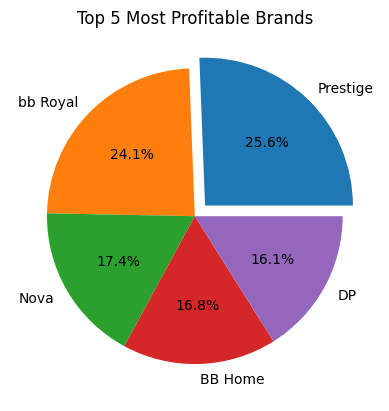

In [ ]:
brand_profit = data.groupby(["brand"])["profit"].sum().reset_index().sort_values(["brand","profit"],ascending=False)
top_5 = brand_profit.nlargest(5,'profit')

slices = top_5['profit']
labels = top_5['brand']
explode = (0.1, 0, 0, 0, 0)  # specify how much each slice should be separated from the center

plt.pie(slices, labels=labels, explode=explode, autopct='%1.1f%%')
plt.title('Top 5 Most Profitable Brands')
plt.show()

##Q2. Which brands are the most popular among BigBasket customers?



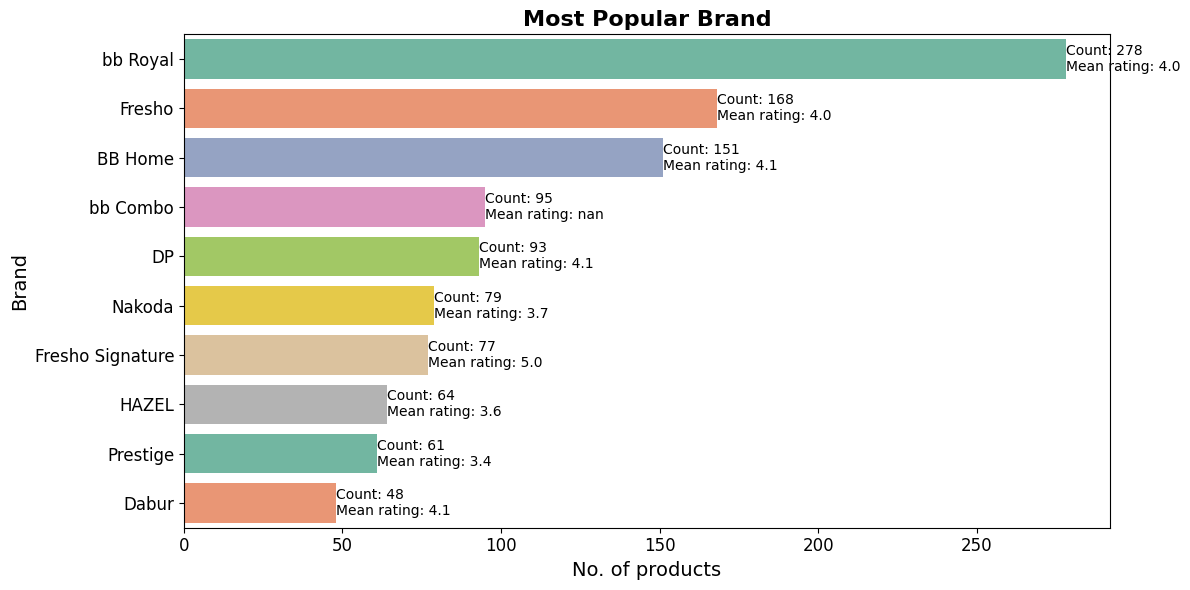

In [ ]:
top_brand = data.groupby('brand').agg(count=('brand', 'count'), mean_rating=('rating', 'mean')).nlargest(10, 'count')

plt.figure(figsize=(12,6))
sns.barplot(y=top_brand.index, x=top_brand['count'], palette='Set2')

# Add mean rating and value count as text on the bars
for i, v in enumerate(top_brand['count']):
    plt.text(v, i, f"Count: {v}\nMean rating: {top_brand.iloc[i]['mean_rating']:.1f}", 
             color='black', ha='left', va='center', fontsize=10)

plt.xlabel("No. of products", fontsize=14)
plt.ylabel("Brand", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Most Popular Brand", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

##Q3. Are there any correlations between the price of a product and its rating or sales 	volume?

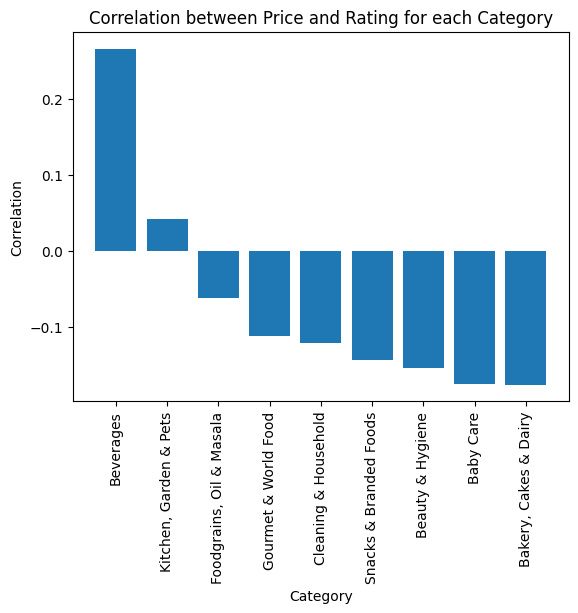

In [ ]:
grouped = data.groupby('category')
correlations = {}

for category, group in grouped:
    correlation = group['sale_price'].corr(group['rating'])
    correlations[category] = correlation
correlation.round(1)

correlations_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['correlation'])
correlations_df = correlations_df.sort_values(by='correlation', ascending=False)

plt.bar(correlations_df.index, correlations_df['correlation'])
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Correlation')
plt.title('Correlation between Price and Rating for each Category')
plt.show()

##Q4. average rate for every products in categorty 

In [ ]:
avg_rating_by_category = data.groupby('category')['rating'].mean().round(1)
avg_rating_by_category = avg_rating_by_category.fillna(0)
avg_rating_by_category

category
Baby Care                   4.2
Bakery, Cakes & Dairy       4.0
Beauty & Hygiene            3.9
Beverages                   4.2
Cleaning & Household        3.9
Eggs, Meat & Fish           0.0
Foodgrains, Oil & Masala    4.1
Fruits & Vegetables         0.0
Gourmet & World Food        4.1
Kitchen, Garden & Pets      3.7
Snacks & Branded Foods      4.1
Name: rating, dtype: float64

In [ ]:
#show the most sell from category and avrg. rating for evry sub-category 
rating_by_subcategory = data.groupby(["category", "sub_category"])["rating"].mean().reset_index().round(1)
rating_by_subcategory
# df_categories_with_rating = pd.merge(df_categories, rating_by_subcategory, on=["category", "sub_category"])

# top_20 = df_categories_with_rating.nlargest(20, "Count")
# top_20

,category,sub_category,rating
0,Baby Care,Baby Accessories,4.1
1,Baby Care,Baby Bath & Hygiene,4.3
2,Baby Care,Baby Food & Formula,4.5
3,Baby Care,Diapers & Wipes,4.1
4,Baby Care,Mothers & Maternity,3.7
...,...,...,...
84,Snacks & Branded Foods,"Noodle, Pasta, Vermicelli",4.2
85,Snacks & Branded Foods,Pickles & Chutney,4.2
86,Snacks & Branded Foods,Ready To Cook & Eat,4.1
87,Snacks & Branded Foods,Snacks & Namkeen,4.6


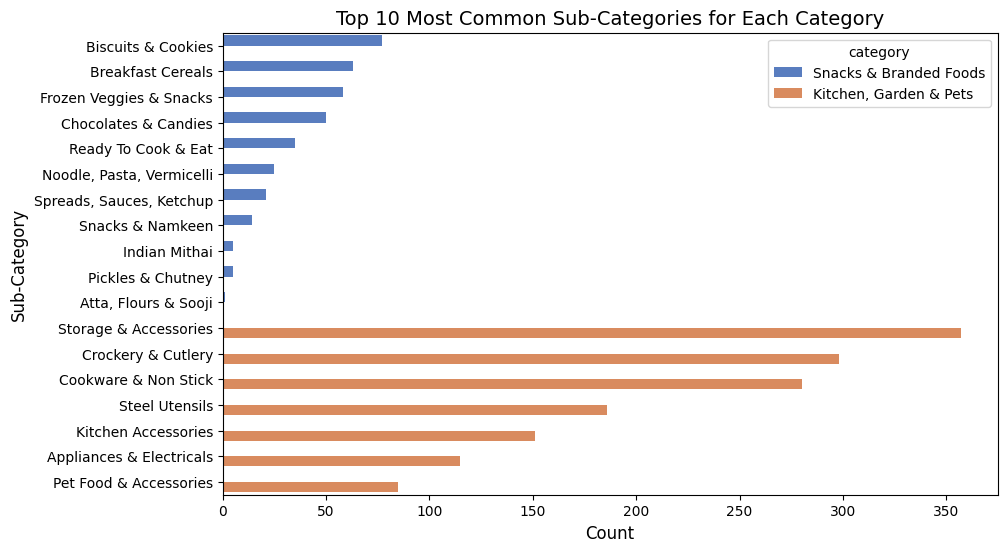

In [ ]:
#visualize it 
rating_by_subcategory = data.groupby(["category", "sub_category"])["rating"].mean().reset_index().round(1)

# Calculate the count of sub-categories for each category
sub_category_counts = data.groupby(["category", "sub_category"]).size().reset_index(name="Count")

# Merge the count data with the rating data
rating_by_subcategory = pd.merge(rating_by_subcategory, sub_category_counts, on=["category", "sub_category"])

# Plot the top 18 sub-categories by count for each category
plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="sub_category", hue="category", data=rating_by_subcategory.sort_values(by=["category", "Count"], ascending=False).head(18), palette="muted")
plt.xlabel("Count", fontsize=12)
plt.ylabel("Sub-Category", fontsize=12)
plt.title("Top 10 Most Common Sub-Categories for Each Category", fontsize=14)
plt.show()